Importa o modelo a ser fatiado e mapeado

In [11]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
Total de [criando as camadas] : 0.5148639678955078
salvando as camadas
Total de [salvando as camadas] : 0.08061027526855469
Total de [Fase 0: ] : 0.5965769290924072


Paredes Finas

In [12]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
teste: caso de uma unica linha no entorno da origem
[3#mErro: nao fechou contorno
teste: caso de uma unica linha no entorno da origem
[3#mErro: nao fechou contorno
teste: caso de uma unica linha no entorno da origem
[3#mErro: nao fechou contorno
OK: fechou contorno
Total de [Criando paredes finas] : 13.818127870559692
Total de [Fase 1: Camada: 0] : 13.9002685546875


TypeError: '<' not supported between instances of 'str' and 'int'

Contornos

In [11]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 4
Total de [Criando Lvls] : 1.173003911972046
Criando os loops
Total de [Criando os loops] : 0.7509784698486328
Criando regiões de influência
Total de [Criando regiões de influência] : 0.040111541748046875
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.3933727741241455
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:1079 maior void:0.33877038895859474Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:1872 maior void:0.5872020075282308Bw -> bloqueado
['Lvl_002', 0, 0] Perdendo total:1636 maior void:0.5131744040150564Bw -> bloqueado
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:0Bw -> bloqueado por limite maximo
['Lvl_003', 0, 0] Perdendo total:15027 maior void:9.170639899623588Bw -> bloqueado
['Lvl_003', 0, 1] Perdendo total:15010 maior void:9.271016311166877Bw -> bloqueado
['Lvl_003', 0,

Pontes

In [12]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        c.make_bridges(n_max, nozzle_diam_internal, folders)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.1980137825012207
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 2.128741979598999
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.02487921714782715
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.011009931564331055
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.06505274772644043
Total de [Fase 3: Camada: 0] : 2.45658540725708
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.22132468223571777
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 2.2877466678619385
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.014684438705444336
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.010603189468383789
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.08803462982177734
Total de [Fase 3: Camada: 1] : 2.6559042930603027
F

Zigzags

In [13]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.335690975189209
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.04482722282409668
Total de [Fase 4: Camada: 0] : 1.439229965209961
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.6803839206695557
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.03101944923400879
Total de [Fase 4: Camada: 1] : 1.7537553310394287
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.613105297088623
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.0367436408996582
Total de [Fase 4: Camada: 2] : 1.6910157203674316
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.289731740951538
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.04393339157104492
Total de [Fase 4: Camada: 3] : 1.3780877590179443
F

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.24182939529418945
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.25476861000061035
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.22482776641845703
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.2377636432647705
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.23942995071411133
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.2382197380065918
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.2682380676269531
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.24391937255859375
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.2655003070831299
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.38854551315307617


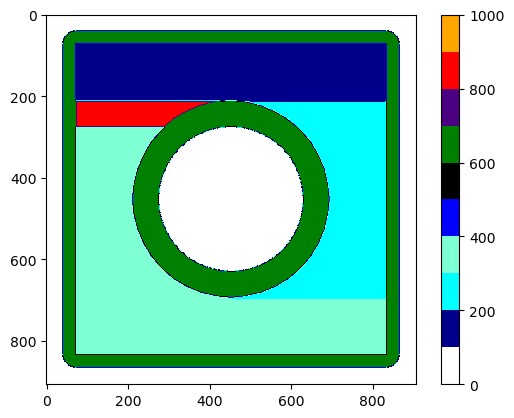

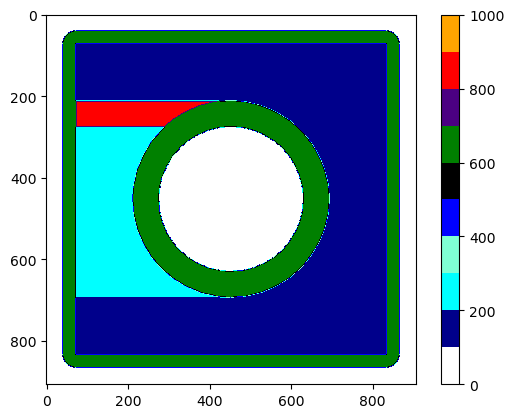

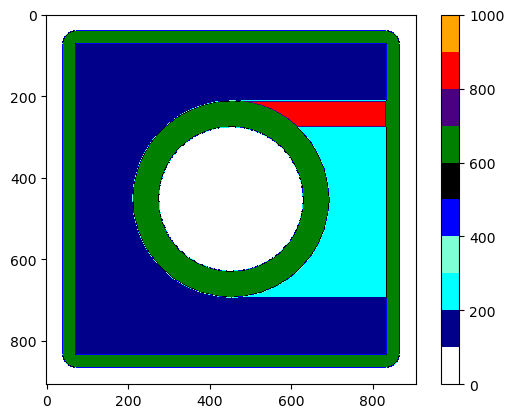

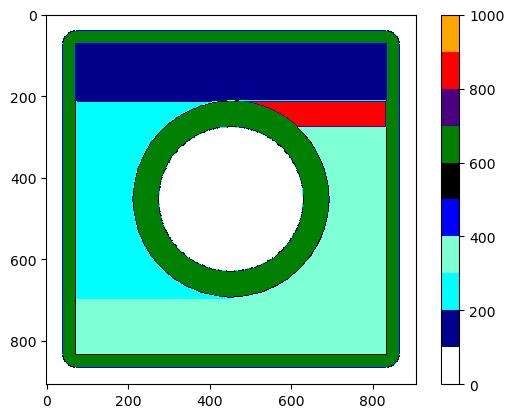

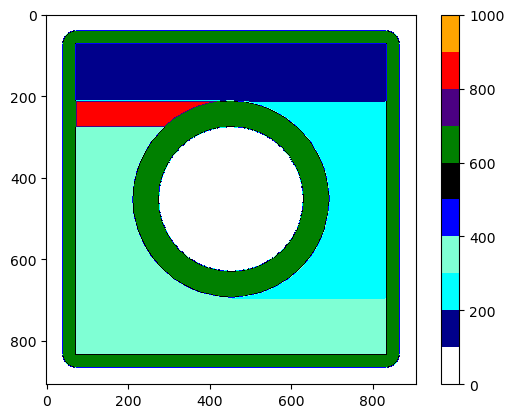

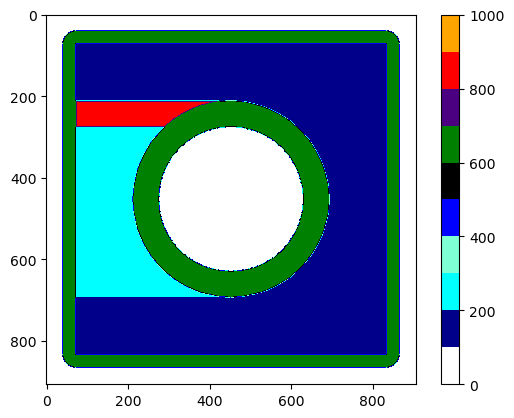

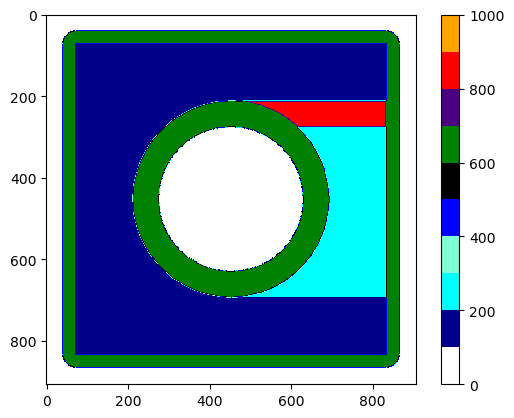

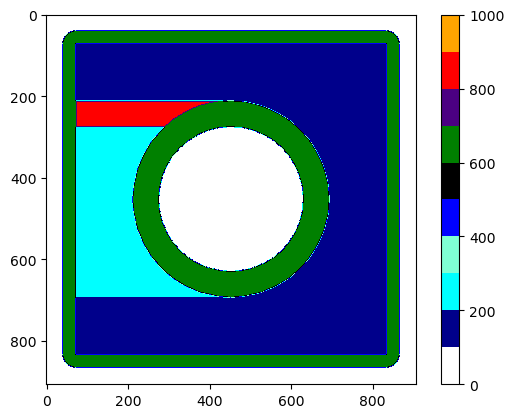

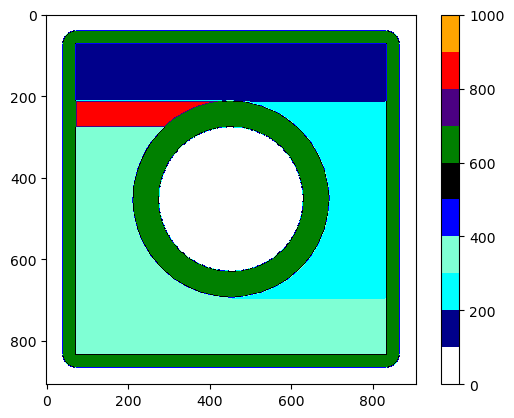

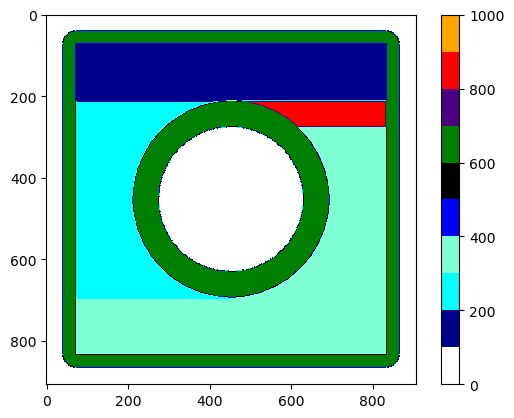

In [14]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [15]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08138084411621094
Total de [Making offset routes] : 1.4892771244049072
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08394551277160645
Total de [Making offset routes] : 1.6490449905395508
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.10750079154968262
Total de [Making offset routes] : 1.572352647781372
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.09478998184204102
Total de [Making offset routes] : 1.5810632705688477
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08419680595397949
Total de [Making offset routes] : 1.5913560390472412
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08080935478210449
Total de [Making offset routes] : 1.7185699939727783
Making offset routes
salvando image

Rotas de pontes

In [16]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06029677391052246
Total de [Making bridges routes] : 0.22601795196533203
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07615804672241211
Total de [Making bridges routes] : 0.27580809593200684
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.055405616760253906
Total de [Making bridges routes] : 0.2483530044555664
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05905938148498535
Total de [Making bridges routes] : 0.26619648933410645
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08663535118103027
Total de [Making bridges routes] : 0.3331460952758789
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05415511131286621
Total de [Making bridges routes] : 0.2984776496887207
Making bridges rou

Rotas de Ziguezague

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 6.762290716171265
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.21093487739562988
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.567285060882568
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.19291138648986816
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.891406536102295
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.19415068626403809
Total de [criando as rotas de zigzag, camada:L_000] : 20.584662675857544
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.11635231971740723
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.03248190879821777
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.001603841781616211
salvando grafos
Total de [salvando grafos] : 0.04222440719604492
Total de [Making zigzag routes] : 21.343327283859253
Mak

Weaving

In [1]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[internal_weaving] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(internal_weaving, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 2.118800640106201
salvando rotas
Total de [salvando rotas] : 0.03820633888244629
Total de [Fase 5 b] : 2.1590359210968018
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.4866664409637451
salvando rotas
Total de [salvando rotas] : 0.08814191818237305
Total de [Fase 5 b] : 1.5754179954528809
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.657712697982788
salvando rotas
Total de [salvando rotas] : 0.04935336112976074
Total de [Fase 5 b] : 1.7131729125976562
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.4729478359222412
salvando rotas
Total de [salvando rotas] : 0.054459571838378906
Total de [Fase 5 b] : 1.5283687114715576
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.7151703834533691
salvando rotas
Total

Rotas de Thin Walls

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.14984130859375e-05
Total de [Making thin walls routes] : 0.03341984748840332
Total de [Fase 5] : 0.03400373458862305
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.00011968612670898438
Total de [Making thin walls routes] : 0.03787565231323242
Total de [Fase 5] : 0.03796863555908203
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.841255187988281e-05
Total de [Making thin walls routes] : 0.040640830993652344
Total de [Fase 5] : 0.04072380065917969
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0004563331604003906
Total de [Making thin walls routes] : 0.03438735008239746
Total de [Fase 5] : 0.034467458724975586
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.744529724121094e-05
T

Unificando rotas EXTERNAS nas camadas

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.6810925006866455
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 1.2191510200500488
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.0003027915954589844
Total de [Conectando rotas externas] : 2.0882389545440674
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.3045690059661865
Total de [Fase 6] : 2.3972432613372803
Fase 6
Conectando rotas externas
Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.6584644317626953
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 1.3716552257537842
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.0001125335693359375
Total de [Conectando rotas externas] : 2.1975767612457275
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.18738770484924316
Total de [Fase 6] : 2.3855895996

Unificando rotas INTERNAS nas camadas

In [1]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.93977952003479
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0032918453216552734
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06211113929748535
Total de [Fase 7] : 3.2567718029022217
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 7.472670316696167
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.006853818893432617
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07422113418579102
Total de [Fase 7] : 7.7662036418914795
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 4.202828884124756
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.003305673599243164
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06297874450683594
Total de [Fase 7] : 4.45597243309021
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.25

Unindo rotas de thin walls

In [2]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0016427040100097656
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0379946231842041
Total de [Fase 8] : 0.12108397483825684
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0014469623565673828
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.052579402923583984
Total de [Fase 8] : 0.11944985389709473
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0016794204711914062
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.025531291961669922
Total de [Fase 8] : 0.07126736640930176
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0010478496551513672
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.025922775268554688
Total de [Fase 8] : 0.06632423400878906
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0014982223510742188
salvando imagens das

Unindo todas as rotas e criando codigo G

In [3]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 9"):
        c.close_final_path(folders)
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, folders)
%reset_selective -f "camadas"

Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.018873929977416992
Total de [Fase 9] : 0.5833768844604492
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.02391791343688965
layer rotacionada
Total de [Fase 9] : 0.6012716293334961
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.017373323440551758
Total de [Fase 9] : 0.6647014617919922
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.014815092086791992
layer rotacionada
Total de [Fase 9] : 0.58306884765625
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.016078472137451172
Total de [Fase 9] : 0.532301664352417
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.013468742370605469
layer rotacionada
Total de [Fase 9] : 0.5430147647857666
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.014500617980957031
Total de [Fase 9] : 0.5825412273406982
Fase 9
Conec

In [9]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [10]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

TypeError: expected string or bytes-like object, got 'NoneType'